# PCA: Principal Component Analysis

## Objectives and ideas

High dimensions generate a large variety of problems (curse of dimensionality, difficulties to visualize/represent the datas...) and thus many techniques have been developped to reduce the dimensionality while keeping as much information as possible. PCA is one of these methods. 

It works by trying to find a new base of lower dimension on which the data can be projected and in which the data will be as spread as possible. The idea is that if data are all at the same place, it is going to be hard to distinguish one datapoint from another whilst if they are spread, it will be easier to differentiate them. In more technical terms, this method aims at finding a new base composed by the directions of **highest variance** for the given data.


To computer the new base, the idea is to modelize the data by a mutlivariate normal distribution (this is a strong prior). From it, we infer a covariance matrix. Its eigen vectors are going to be the axis of highest variance and the corresponding eigen values are the variance of the data along thoses axis. If you want a better understanding of what the eigen vectors of the covariance matrix are, please read this [quora answer](https://www.quora.com/What-is-an-eigenvector-of-a-covariance-matrix). The eigen vectors are going to form the new base. To reduce the dimensionality, one just needs to remove the eigen vectors with the smallest eigen values (it will also give an information about how much information is lost in the process).

Now, you may have notice one thing. The new base, as the eigen vectors are a linear combination of the initial base vectors (that is to say the features), will most certainly loose of its semantic meaning ($.7 \times age + 0.4 \times weight$ is a variable rather hard to interpret).


## Implementation steps

- generate the dataset
- compute the covariance matrix from the data
- diagonalize the latter
- find the eigen vector and sort them according to their eigen values
- plot the eigen vectors and the data projected on different sub-spaces

Note that most of the code is not dimension agnostic. You will need to modify some variables/part of the code to change the dimensionality.

In [1]:
# to display interactive plots within the notebook
%matplotlib notebook
# to define the size of the plotted images
from pylab import rcParams
rcParams['figure.figsize'] = (10, 8)

import matplotlib.pyplot as plt
import numpy as np

from fct import generate_multivariate, normalize, plot_3d, plot_2d, Arrow3D

/Users/lachaum/.pyenv/versions/p3/lib/python3.4/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


## Generate the data

We generate random variables using a mulitvariate gaussian distribution. This correspond to the perfect case (the data actually follow a multivariate normal).

<IPython.core.display.Javascript object>


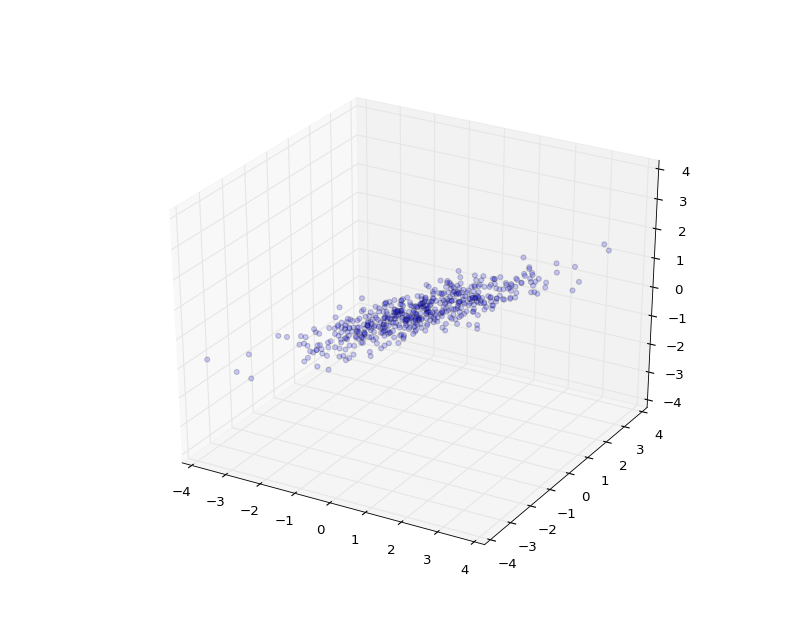

In [2]:
data = generate_multivariate(size=500, dimension=3)
plot_3d(data)

## Calculate the covariance matrix and get the eigen values/vectors

RQ: It is interesting to note that the obtained covariance matrix (cov in the code) is not necessarily the same as the one used to generate the data. This is because we use a finite number of datapoint to infer the matrix. If this number streches towards infinity, the computed covariance matrix and the original one will be identical.

In [3]:
# build the covariance matrix from the randomly generated data
cov = np.cov(data.T)

# get its eigen values and vectors
eigenvalues, eigenvectors = np.linalg.eig(cov)

# sorting the eigenvalues
idx = eigenvalues.argsort()[::-1]  
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]

## Plot the eigen vectors on the data

This part is not dimension agnostic, if you change the dimension when generating the data, you will need to change this part of the code.

<IPython.core.display.Javascript object>


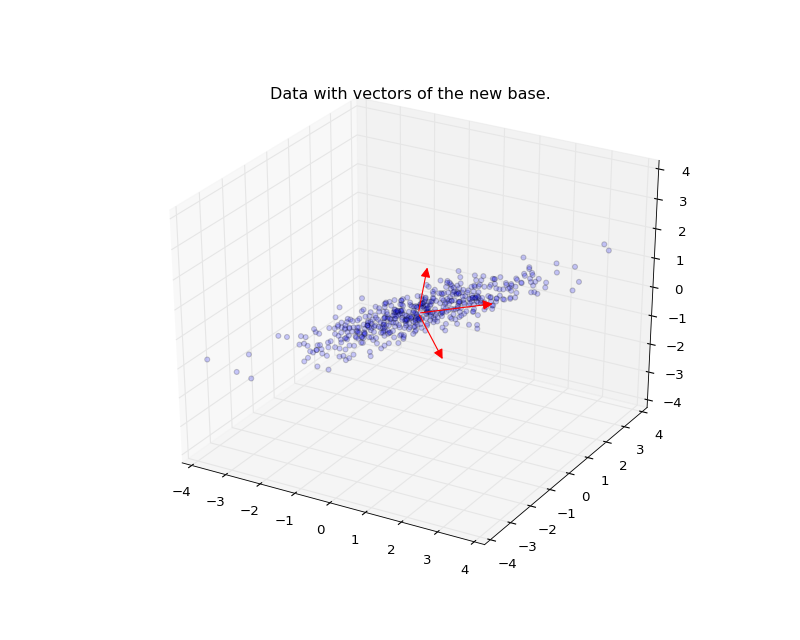

In [4]:
fig = plt.figure()
# RQ: gca = get current axis
ax = fig.gca(projection='3d')
data_t = data.T
maxi = max([max(abs(el)) for el in data])
ax.set_xlim([-maxi, maxi])
ax.set_ylim([-maxi, maxi])
ax.set_zlim([-maxi, maxi])
ax.scatter(data_t[0], data_t[1], data_t[2], alpha=0.2)
plt.title('Data with vectors of the new base.')

for vector in eigenvectors:
    # vectors are made bigger to better visualize them
    vector_plt = 2 * vector
    a = Arrow3D([0, vector_plt[0]],[0, vector_plt[1]],[0, vector_plt[2]], 
                mutation_scale=20, lw=1, arrowstyle="-|>", color="r")
    ax.add_artist(a)

Now let's check that the eigen vectors form indeed a base

In [5]:
# The new vectors might not seem orthogonal because of scaling issues so
# here is a proof.
# Note that sometimes, as computers tend to have issues with
# floating numbers, you might not get 0.0 but a very very
# small number (10^-16 for instance).
v1, v2, v3 = eigenvectors

print(sum(v1 * v2))
print(sum(v1 * v3))
print(sum(v2 * v3))

1.73472347598e-16
-3.12250225676e-16
4.4408920985e-16


## Projection of the data on the different planes

To project we use the following formula:
$\mathbf{x} \cdot \mathbf{y} = \sum_{i} x_i y_i$

This part of the code could be greatly improved by using matrix multiplication.

In [6]:
def projection(data, vectors):
    """Return the dataset projected on the two vectors given."""
    
    v1, v2 = vectors
    data_projected = []
    
    for datapoint in data:
        # we use a scalar product to project on the new base (v1, v2)
        # RQ: the multiplication datapoint * v is only possible
        # because datapoint is a ndarray.
        new_data = []
        new_data.append(sum(datapoint * v1))
        new_data.append(sum(datapoint * v2))
        data_projected.append(np.array(new_data))
    
    return data_projected

def plot_projection(data, vectors, title=''):
    data_projected = projection(data, vectors)
    fig = plt.figure()
    maxi = max([max(abs(el)) for el in data])
    plot_2d(data_projected, color='b', alpha=1, maxi=maxi, fig=fig, title=title)

<IPython.core.display.Javascript object>


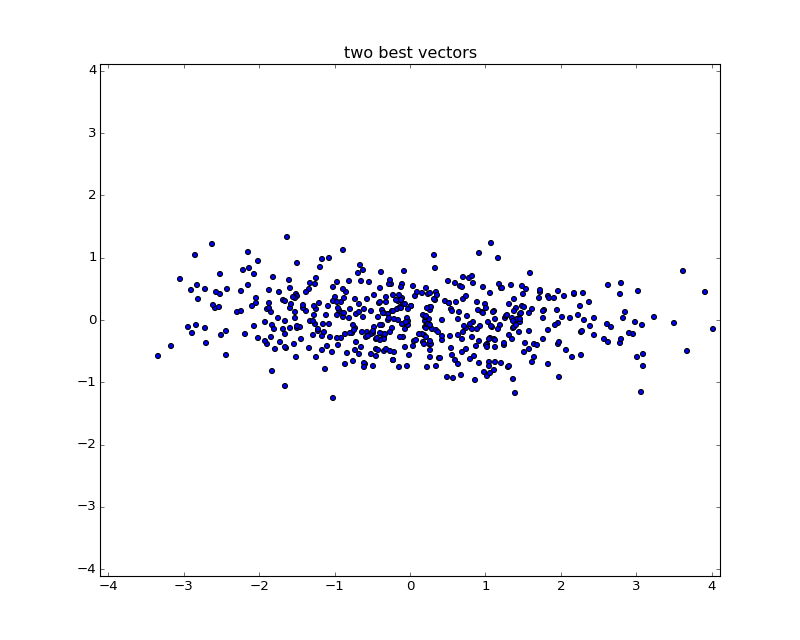

<IPython.core.display.Javascript object>


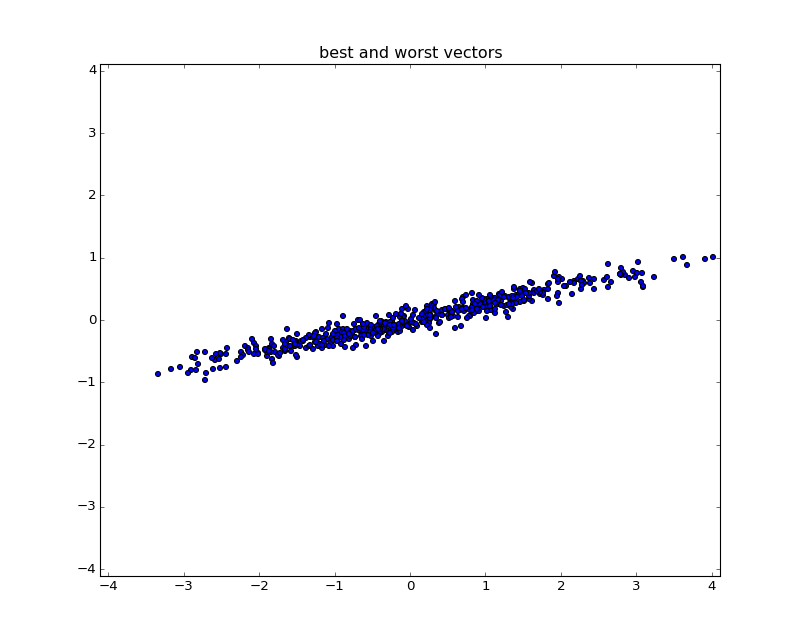

<IPython.core.display.Javascript object>


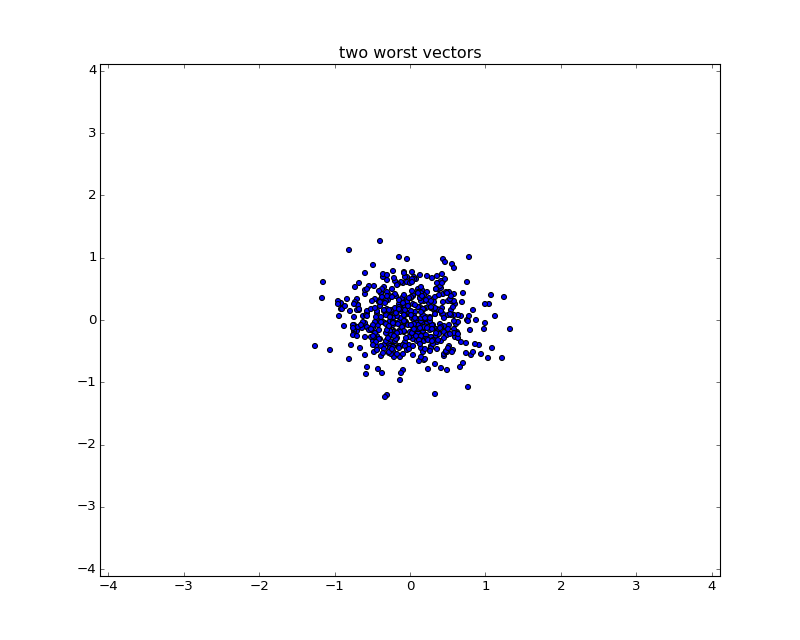

In [7]:
plot_projection(data, [v1, v2], title='two best vectors')
plot_projection(data, [v1, v3], title='best and worst vectors')
plot_projection(data, [v2, v3], title='two worst vectors')

The scale used to represent the three projections is the same.
We can notice that the datapoints are more spread in the first plot that in the last one.